In [1]:
#, make clustermaps for bone fide TS and get p values to add to right side of charts
import pandas as pd
import os

import scipy.stats
from scipy.stats import hypergeom
import statsmodels.stats.multitest as smm
import matplotlib.pyplot as plt

%pylab inline
import seaborn as sns

import numpy

Populating the interactive namespace from numpy and matplotlib


In [3]:
#import single factor analysis. (generated with '111719 single factor analysis-OH motifs compare.ipynb')
ba_df=pd.read_csv("../../output/072220_single_factor_analysis_data_DE_NB_ba_OH_motif_compare.csv",sep=',')
sc_df=pd.read_csv("../../output/072220_single_factor_analysis_data_DE_NB_sc_OH_motif_compare.csv",sep=',')

#import brain atlas data
ba=pd.read_csv("../../data/BrainAtlas/Binary Brain atlas V17_w_120619_HB_data_Jan_10_2020.csv",sep=",")

#import signle cell data (see ipynb for converting data to binary)
sc=pd.read_csv("../../data/scRNAseq_Cengen2020/071020_sc_neuron_class_vs_all_DE_WX_binary.csv",sep=',')


In [35]:
tfiles=os.listdir("../../data/TargetOrtho_data/TargetOrtho_data_genes_corrected/")


In [36]:
data_source='sc'
df=sc_df

In [213]:
data_source='ba'
df=ba_df

In [37]:
run_these=[['ASE','che-1'],['AIY','ceh-10--ttx-3'],['AIY','ceh-10'],['AIY','ttx-3'],['DA','unc-3'],['DB','unc-3'],['VA','unc-3'],['VB','unc-3']]
cols=['model','TF', 'motif_ID', 'neuron_class', 'obs_motif','marker_count','fc','hg_pval*', 'rs_pval*']
for i in run_these:
    nc=i[0]
    tf=i[1]
    r=df.loc[(df["neuron_class"]==nc) & (df["TF"]==tf)][cols].values[0]
    #print(r)
    print( '%s\t%s\t%s\t%s\t%s\t%s\t%.2f\t%.2e\t%.2e' %(r[0],r[1],r[2],r[3],r[4],r[5],r[6],r[7],r[8]))
    print( '%.2f\t%.2f\t%.2e\t%.2e' %(r[4]/r[5],r[6],r[7],r[8]))

A-I	che-1	OH2004_CHE-1	ASE	220.0	336.0	1.64	3.43e-21	4.63e-27
0.65	1.64	3.43e-21	4.63e-27
A-I	ceh-10--ttx-3	OH2007_CEH-10_TTX-3	AIY	131.0	177.0	1.43	1.25e-09	6.25e-22
0.74	1.43	1.25e-09	6.25e-22
A-I	ceh-10	M00287_2.00	AIY	104.0	177.0	1.53	2.89e-08	2.56e-05
0.59	1.53	2.89e-08	2.56e-05
A-I	ttx-3	M02085_2.00	AIY	86.0	177.0	1.96	1.02e-11	6.56e-03
0.49	1.96	1.02e-11	6.56e-03
A-I	unc-3	OH2011_UNC-3	DA	437.0	901.0	2.38	1.66e-82	5.06e-49
0.49	2.38	1.66e-82	5.06e-49
A-I	unc-3	OH2011_UNC-3	DB	523.0	1280.0	2.01	9.64e-67	7.29e-49
0.41	2.01	9.64e-67	7.29e-49
A-I	unc-3	OH2011_UNC-3	VA	231.0	366.0	3.10	3.93e-71	6.21e-36
0.63	3.10	3.93e-71	6.21e-36
A-I	unc-3	OH2011_UNC-3	VB	413.0	1275.0	1.59	2.49e-25	1.05e-25
0.32	1.59	2.49e-25	1.05e-25


In [38]:
#add clustermaps

In [46]:
def get_sc_genes(neuron_class):
    return sorted(list(sc.loc[sc[neuron_class]==1]["gene_name"].values))

def get_ba_genes(neuron_class):
    df=ba.loc[ba["class"]==neuron_class]
    
    df=df.transpose()[4:]
    df.columns=list(range(len(df.columns)))
    genes=[]
    for i in range(len(df.columns)):
        g=list(df.index[df[i]==1])
        genes=genes+g
    #if gene is in isoform notation, reduce to main gene name (targetortho doesn't distinguish isoforms)
    correct_these={'inx-1a':'inx-1','inx-1b':'inx-1','inx-18a':'inx-18','inx-18b':'inx-18','inx-10a':'inx-10','inx-10b':'inx-10'}
    genes_corrected=[]
    for gene in genes:
        if gene not in correct_these.keys():
            genes_corrected.append(gene)
        else:
            genes_corrected.append(correct_these[gene])
    genes=list(set(genes_corrected))
    return sorted(list(set(genes)))

In [40]:
def import_TO_data(filename,motif_ID):
    tdata=pd.read_csv("../../data/TargetOrtho_data/TargetOrtho_data_genes_corrected/%s" %(filename),sep=',')
    tdata["motif_name"]=motif_ID
    return tdata

def get_TO_df(TF,motif_ID): 
    tdata_df=pd.DataFrame()
    for tfile in tfiles:
        if tfile.startswith("%s_%s" %(TF,motif_ID)):
            tdata_df=tdata_df.append(import_TO_data(tfile,motif_ID))
    tdata_df=tdata_df[["ref_gene_name","Rank","motif_name"]]
    return tdata_df


In [41]:
def get_Markers_w_motifs(gene_list,tdataA):

    resultsA=tdataA.loc[tdataA["ref_gene_name"].isin(gene_list)][["ref_gene_name","Rank"]].sort_values(ascending=False, by="Rank")
   
    A=list(resultsA["ref_gene_name"])
    ranks= list(resultsA["Rank"])
    return A,ranks

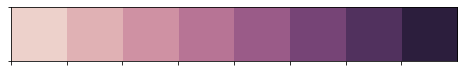

In [42]:
cmap=sns.palplot(sns.cubehelix_palette(8))
  
plt.savefig("../../output/figure_parts/Fig4_colorbar.pdf" ,format='pdf')

In [76]:
cmap=sns.cubehelix_palette(dark=0, light=1, as_cmap=True)


In [77]:
#imort curated list of motifs to use (excludes extra unc-3, che-1 motifs, removes repressors mab-9 and cog-1)
#imort curated list of motifs to use (excludes extra unc-3, che-1 motifs, removes repressors mab-9 and cog-1)
cdat=pd.read_csv("../../data/motif_information/curated_motifs_071320b_with_neuron_class_expression_per_dataset.csv",sep=',')
#ctab=ctab.loc[ctab['exclusion_rule']=='None']

#just look at OH motifs and corresponding PBM motifs
TFs=['che-1','unc-3','ceh-10','ttx-3','ceh-10--ttx-3']
cdat=cdat.loc[cdat['TF_Name'].isin(TFs)]

In [78]:
run_these={'ASE':['che-1'],'DA':['unc-3'],'DB':['unc-3'],'VA':['unc-3'],'VB':['unc-3']}
#'AIY':['ceh-10--ttx-3','ceh-10','ttx-3']

sc
ASE che-1
OH2004_CHE-1
8030 8030
336 len nclass_genes
[30.060000000000002, 30.39, 31.36, 32.2, 32.709999999999994, 32.83, 33.129999999999995, 35.28, 35.47999999999999, 36.46999999999999] 99.99 0
M00609_2.00
5697 5697
336 len nclass_genes
[55.62, 56.44, 56.730000000000004, 57.3, 58.14, 58.35, 58.54, 59.95, 60.08, 60.47] 99.96 0
   B0222.1  B0222.11  B0294.1  B0310.3  B0361.4  B0457.6  B0495.9  C04F6.7  \
0    55.57      0.00    97.25    95.28      0.0      0.0    59.98    98.73   
1    99.10     98.54     0.00    98.74      0.0      0.0    78.03    93.05   

   C05C12.5  C05G5.3  ...  tct-1  ttr-44  tyra-2  ugt-56  unc-132  unc-43  \
0     52.11      0.0  ...  80.04   46.40     0.0    0.00      0.0     0.0   
1     73.04      0.0  ...  92.00   98.31     0.0   77.58      0.0     0.0   

   upp-1  vem-1  wdr-60  xbx-3  
0  40.52  77.28   67.21  82.23  
1  97.53  89.92   81.23  98.93  

[2 rows x 336 columns]
che-1	ASE
Spearman correlation: 0.35, p= 2.86e-11


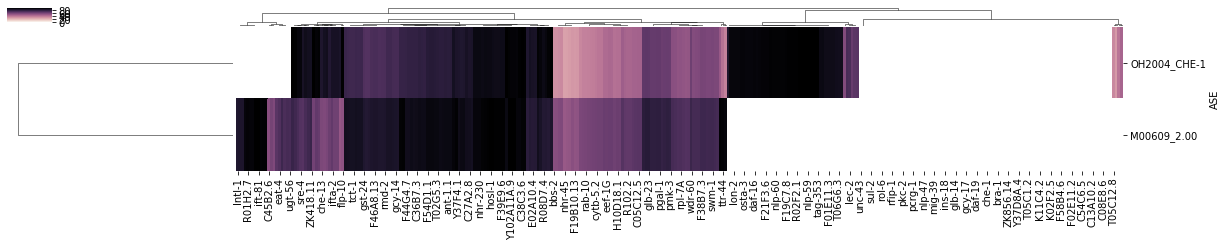

DA unc-3
OH2011_UNC-3
4087 4087
901 len nclass_genes
[69.72999999999999, 70.03999999999999, 70.06, 70.14, 70.25999999999999, 70.5, 70.58, 70.81, 71.12, 71.24000000000001] 99.99 0
M03721_2.00
2473 2473
901 len nclass_genes
[82.2, 82.27, 82.3, 82.4, 82.41, 82.44, 82.46000000000001, 82.49000000000001, 82.51, 82.57] 99.96 0
   AH9.6  B0395.3  B0416.5  C01C4.3  C01F1.6  C01G6.5  C02B10.3  C03H5.6  \
0    0.0      0.0     0.00      0.0    92.40    95.52       0.0      0.0   
1    0.0      0.0    94.34      0.0    96.28    99.42       0.0      0.0   

   C04E6.7  C06A1.2  ...  xnp-1  yop-1  zfp-1  zig-1  zig-10  zig-8  zoo-1  \
0      0.0    93.06  ...   97.3  83.50  90.71    0.0     0.0    0.0    0.0   
1      0.0    96.91  ...    0.0  91.71  94.75    0.0     0.0    0.0    0.0   

   ztf-26  zyg-9  zyx-1  
0     0.0  77.85    0.0  
1     0.0  87.81    0.0  

[2 rows x 901 columns]
unc-3	DA
Spearman correlation: 0.33, p= 7.32e-25


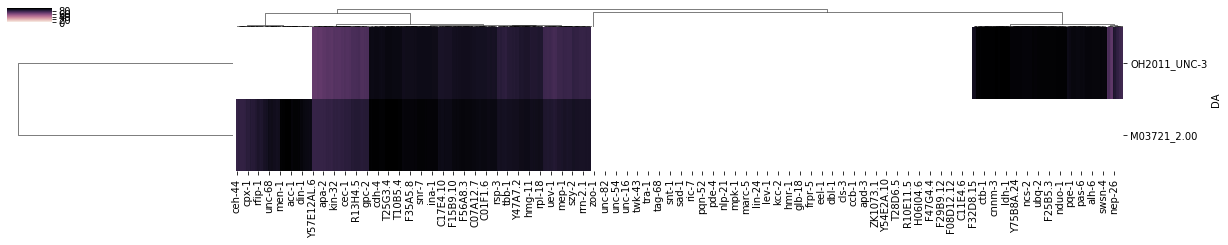

DB unc-3
OH2011_UNC-3
4087 4087
1280 len nclass_genes
[69.72999999999999, 69.87, 69.96000000000001, 70.03999999999999, 70.06, 70.14, 70.33, 70.41999999999999, 70.44, 70.58] 99.99 0
M03721_2.00
2473 2473
1280 len nclass_genes
[82.27, 82.3, 82.36, 82.4, 82.41, 82.44, 82.47, 82.49, 82.51, 82.57] 99.96 0
   AH9.6  B0395.3  B0416.5  B0491.5  C01C4.3  C01G6.5  C02B10.3  C03A3.1  \
0    0.0      0.0     0.00    72.56      0.0     98.8       0.0      0.0   
1    0.0      0.0    95.87    83.43      0.0      0.0       0.0      0.0   

   C03H5.6  C04F12.5  ...  zig-1  zig-11  zig-8  zip-2  zmp-4  zoo-1  ztf-26  \
0      0.0     97.88  ...    0.0     0.0    0.0  99.13  74.58    0.0     0.0   
1      0.0      0.00  ...    0.0     0.0    0.0   0.00  84.84    0.0     0.0   

   ztf-6  zyg-9  zyx-1  
0  93.27  79.41    0.0  
1   0.00  88.44    0.0  

[2 rows x 1280 columns]
unc-3	DB
Spearman correlation: 0.47, p= 7.64e-73


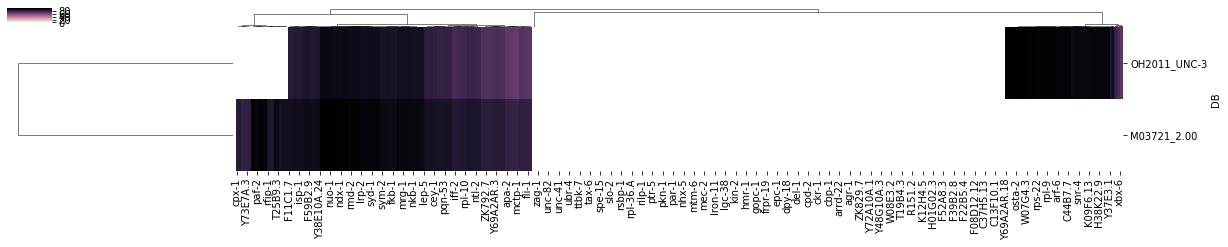

VA unc-3
OH2011_UNC-3
4087 4087
366 len nclass_genes
[69.73, 70.42, 71.12, 71.24, 71.28, 71.33, 72.46000000000001, 72.92, 73.32, 73.77] 99.98 0
M03721_2.00
2473 2473
366 len nclass_genes
[82.2, 82.27000000000001, 82.3, 82.4, 82.49, 82.67, 82.72, 82.79, 82.8, 82.91] 99.9 0
   AH9.6  B0416.5  C01C4.3  C02B10.3  C06A1.2  C06E7.2  C08G9.1  C09G1.4  \
0    0.0    99.40    98.25       0.0    93.31    93.88      0.0      0.0   
1    0.0    90.24    98.16       0.0    98.56    98.91      0.0      0.0   

   C11H1.7  C13A10.2  ...  vha-10  vha-13  vha-8  vnut-1  vps-25  vps-60  \
0    94.81     94.28  ...   90.76   94.29    0.0   71.12   96.31   82.31   
1     0.00     99.14  ...   95.95   99.16    0.0   82.49   98.42   89.57   

   zig-1  zig-8  zoo-1  zyx-1  
0    0.0  99.43  98.68    0.0  
1    0.0   0.00   0.00    0.0  

[2 rows x 366 columns]
unc-3	VA
Spearman correlation: 0.35, p= 4.78e-12


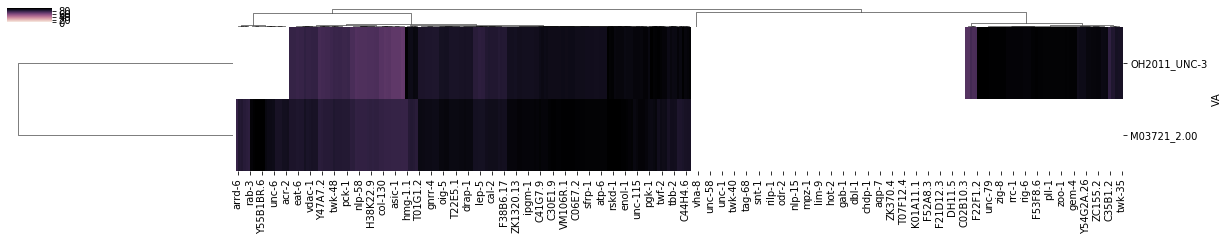

VB unc-3
OH2011_UNC-3
4087 4087
1275 len nclass_genes
[69.73, 69.87, 69.91, 69.99000000000001, 70.03999999999999, 70.06, 70.33, 70.42, 70.58, 70.69] 99.81 0
M03721_2.00
2473 2473
1275 len nclass_genes
[82.19, 82.27000000000001, 82.36, 82.4, 82.47, 82.49, 82.51, 82.61, 82.67, 82.72] 99.93 0
   AH9.6  B0001.4  B0303.4  B0303.7  B0393.8  B0416.5  B0457.6  B0491.6  \
0    0.0    87.14    93.27      0.0     75.5      0.0     0.00    98.34   
1    0.0    88.74     0.00      0.0      0.0      0.0    89.35    95.95   

   B0546.4  C01A2.4  ...  ykt-6  yop-1  zag-1  zfp-1  zig-8  zip-2  zipt-7.1  \
0    74.88    99.09  ...    0.0  89.56    0.0  94.73    0.0   0.00       0.0   
1    83.92     0.00  ...    0.0  89.37    0.0   0.00    0.0  99.72       0.0   

   ztf-6  zyg-9  zyx-1  
0  96.03  80.64    0.0  
1   0.00   0.00    0.0  

[2 rows x 1275 columns]
unc-3	VB
Spearman correlation: 0.37, p= 9.12e-42


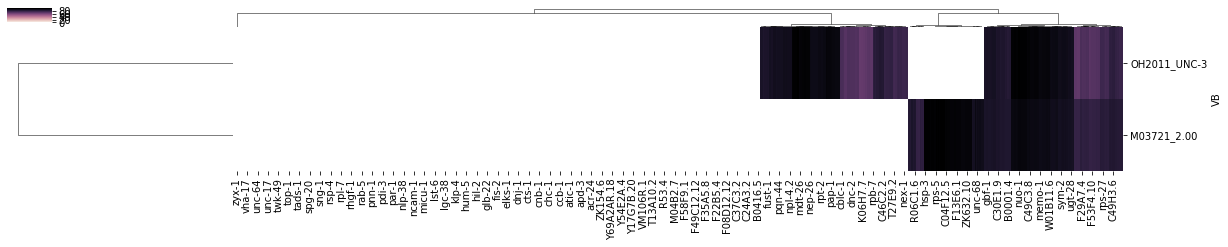

In [82]:
#single cell atlas data
data_source='sc'
df=sc_df
print(data_source)

for nclass in run_these.keys(): 
    for TF in run_these[nclass]:
        print(nclass, TF)
        d=pd.DataFrame()
        #get motif_ID
        motif_IDs=list(cdat.loc[cdat['TF_Name']==TF]['motif_ID'].values)
        for motif_ID in motif_IDs:
            
            print(motif_ID)
            tdata=get_TO_df(TF,motif_ID)
            print(len(tdata), len(tdata))
            if data_source=='ba':
                nclass_genes=get_ba_genes(nclass)
            if data_source=='sc':
                nclass_genes=get_sc_genes(nclass)
            print(len(nclass_genes), 'len nclass_genes')
            genes_w_motifs,ranks=get_Markers_w_motifs(nclass_genes,tdata)
            genes_no_motif=list(set(nclass_genes)-set(genes_w_motifs))
            
            
            #need to convert to percentile ranks. (1 to 1000), 100-1/1000*(1000/100) to 100-(i/len(ranks))*(len(ranks)/100)
            binary=[0 for g in genes_no_motif]
            binary=[100-(i/len(ranks))*(len(ranks)/100) for i in ranks]+binary
            print(binary[:10], max(binary), min(binary))
            
            headers=genes_no_motif+genes_w_motifs
            dictionary = dict(zip(headers, binary))
            d=d.append(dictionary,ignore_index=True)
            #print(d.head(2))
            #d=d[headers]

            #fig, ax = plt.subplots(figsize=(20,.5))         # Sample figsize in inches

            #sns.heatmap(d, annot=False,cmap="Purples",xticklabels=False, yticklabels=True)



            #plt.show()

            #d=d.append(d
    print(d.head(3))
    d=d.fillna(0)
    #do wilcoxon paired test on two lists of ranks to see if ranks are sig. diff.
    #wx=scipy.stats.wilcoxon(list(d.iloc[0].values),list(d.iloc[1].values),zero_method='zsplit')
    #print(nclass, motif_IDs, wx)
    
    sp=scipy.stats.spearmanr(list(d.iloc[0].values),list(d.iloc[1].values))
    print( "%s\t%s" %(TF, nclass))
    print("Spearman correlation: %.2f, p= %.2e" %(sp[0],sp[1]))

    d['%s' %nclass]=motif_IDs
    d=d.set_index('%s' %nclass)
    f=sns.clustermap(d,figsize=(20, 3), cmap=cmap)
    plt.setp(f.ax_heatmap.get_yticklabels(), rotation=0)
    plt.setp(f.ax_heatmap.get_xticklabels(), rotation=90)
    #plt.ylabel(nclass)
    plt.savefig('../../output/figure_parts/FigS3_clustermap_%s_%s.pdf' %(data_source,nclass))

    plt.show()

In [56]:
wx=scipy.stats.wilcoxon(list(d.iloc[0].values),list(d.iloc[1].values),zero_method='zsplit')
print(wx)
print(scipy.stats.spearmanr(list(d.iloc[0].values),list(d.iloc[1].values)))

WilcoxonResult(statistic=317783.0, pvalue=2.608475035209822e-12)
SpearmanrResult(correlation=0.5648378475035785, pvalue=2.387614257742705e-108)


M02085_2.00 ttx-3 AIY
[61.129999999999995, 61.6, 66.46, 66.57, 67.25999999999999, 67.28999999999999, 67.88999999999999, 68.89, 69.72, 71.3] 99.88 0
M00287_2.00 ceh-10 AIY
[42.199999999999996, 42.54999999999999, 44.62, 45.81999999999999, 46.209999999999994, 46.46, 47.269999999999996, 47.36, 47.92999999999999, 48.059999999999995] 99.81 0
OH2007_CEH-10_TTX-3 ceh-10--ttx-3 AIY
[5.810000000000002, 6.219999999999999, 7.409999999999997, 8.209999999999994, 12.489999999999995, 19.340000000000003, 23.459999999999994, 24.680000000000007, 24.870000000000005, 27.269999999999996] 99.99 0
                     B0207.7  C16B8.4  F16C3.1  F17C11.2  F48E3.8  F54E4.4  \
AIY                                                                          
M02085_2.00             0.00      0.0     0.00       0.0    91.06     0.00   
M00287_2.00             0.00      0.0    99.72       0.0    70.10     0.00   
OH2007_CEH-10_TTX-3    86.11      0.0    99.98       0.0    90.23    88.93   

                     F55C12.

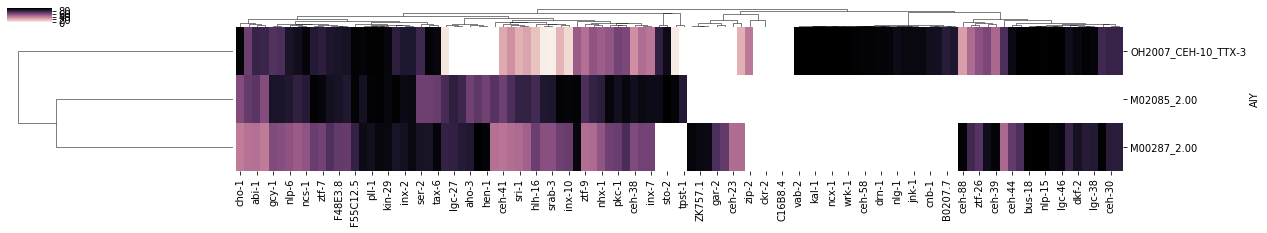

In [84]:
TFs=['ttx-3','ceh-10','ceh-10--ttx-3']
d=pd.DataFrame()
for TF in TFs:
    nclass='AIY'
    
    #get motif_ID
    motif_ID=cdat.loc[cdat['TF_Name']==TF]['motif_ID'].values[0]
    print(motif_ID, TF, nclass)

    tdata=get_TO_df(TF,motif_ID)
    if data_source=='ba':
        nclass_genes=get_ba_genes(nclass)
    if data_source=='sc':
        nclass_genes=get_ba_genes(nclass)
    genes_w_motifs,ranks=get_Markers_w_motifs(nclass_genes,tdata)

    #print(ranks)
    genes_no_motif=list(set(nclass_genes)-set(genes_w_motifs))
    #binary=[0 for g in genes_no_motif]
    #binary=binary+[100-i for i in ranks]
    
    binary=[0 for g in genes_no_motif]
    binary=[100-(i/len(ranks))*(len(ranks)/100) for i in ranks]+binary
    print(binary[:10], max(binary), min(binary))
    
    headers=genes_no_motif+genes_w_motifs
    dictionary = dict(zip(headers, binary))
    d=d.append(dictionary,ignore_index=True)
    #print(d.head(2))
    #d=d[headers]

    #fig, ax = plt.subplots(figsize=(20,.5))         # Sample figsize in inches

    #sns.heatmap(d, annot=False,cmap="Purples",xticklabels=False, yticklabels=True)



    #plt.show()

    #d=d.append(d)
d=d.fillna(0)
d['%s' %nclass]=['M02085_2.00','M00287_2.00','OH2007_CEH-10_TTX-3']
d=d.set_index('%s' %nclass)
print(d.head(3))
#wx=scipy.stats.wilcoxon(list(d.iloc[0].values),list(d.iloc[1].values),zero_method='zsplit')
#print(nclass, motif_IDs, wx)
print(TFs, nclass)
sp=scipy.stats.spearmanr(list(d.iloc[2].values),list(d.iloc[0].values))
print("Spearman: r= %.2f, p= %.2e" %(sp[0],sp[1]))

sp=scipy.stats.spearmanr(list(d.iloc[2].values),list(d.iloc[1].values))
print("Spearman: r= %.2f, p= %.2e" %(sp[0],sp[1]))

sp=scipy.stats.spearmanr(list(d.iloc[0].values),list(d.iloc[1].values))
print("Spearman: r= %.2f, p= %.2e" %(sp[0],sp[1]))
f=sns.clustermap(d,figsize=(20, 3), cmap=cmap)
plt.savefig('../../output/figure_parts/FigS3_clustermap_%s_%s.pdf' %(data_source,nclass))

plt.show()

In [59]:
 #check paired t test version of wilcoxon to see if ranked differ. significantly
d.reindex(motif_IDs)

B0207.7  C16B8.4  F16C3.1  F17C11.2  F48E3.8  F54E4.4  F55C12.5  \
AIY                                                                             
OH2011_UNC-3      NaN      NaN      NaN       NaN      NaN      NaN       NaN   
M03721_2.00       NaN      NaN      NaN       NaN      NaN      NaN       NaN   

              M02B1.2  R10H10.4  T19C4.5  ...  zfh-2  zip-2  zip-4  ztf-11  \
AIY                                       ...                                
OH2011_UNC-3      NaN       NaN      NaN  ...    NaN    NaN    NaN     NaN   
M03721_2.00       NaN       NaN      NaN  ...    NaN    NaN    NaN     NaN   

              ztf-18  ztf-26  ztf-3  ztf-4  ztf-7  ztf-9  
AIY                                                       
OH2011_UNC-3     NaN     NaN    NaN    NaN    NaN    NaN  
M03721_2.00      NaN     NaN    NaN    NaN    NaN    NaN  

[2 rows x 108 columns]